In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

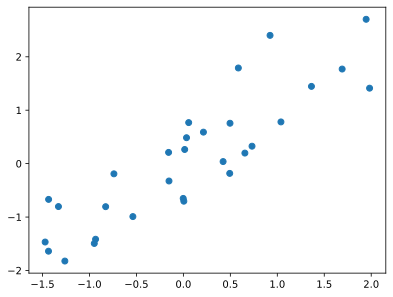

In [49]:
# create data

N = 30
x = torch.randn(N, 1)
y = x + torch.randn(N, 1)/2

#and plot
plt.scatter(x, y)
plt.show()

In [50]:
#build model
ANNreg = nn.Sequential(
    nn.Linear(1,1),   # input Layer
    #nn.ReLU(),        # activation function
    #nn.Linear(1,1)    # output layer
)
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

In [51]:
#learning rate
learningRate = .05

#loss function 
lossfun = nn.MSELoss()

#optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(), lr = learningRate)

In [52]:
#train the model
numepochs = 500
losses = torch.zeros(numepochs)

##train the model!
for epoch_i in range(numepochs):

    #forward pass 
    yHat = ANNreg(x)

    #compute loss 
    loss = lossfun(yHat, y)
    losses[epoch_i] = loss

    #back prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


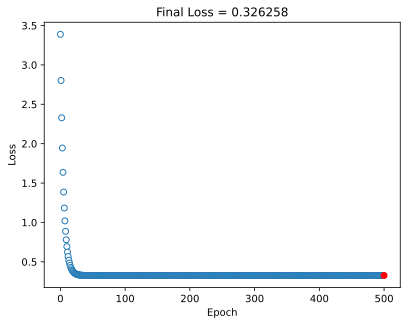

In [53]:
#show the losses 

#manually compute losses
#final forward pass

predictions = ANNreg(x)

#final loss (MSE)
testloss = (predictions - y).pow(2).mean()

plt.plot(losses.detach(),'o' ,markerfacecolor = 'w', linewidth = .1)
plt.plot(numepochs, testloss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final Loss = %g' %testloss.item())
plt.show()

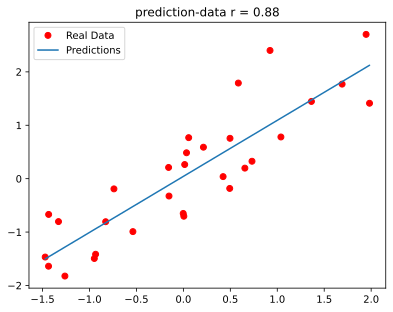

In [58]:
#plot the data
plt.plot(x, y, 'ro', label = 'Real Data')
plt.plot(x, predictions.detach(), label = "Predictions")
plt.title(f'prediction-data r = {np.corrcoef(y.T, predictions.detach().T)[0, 1]:.2f}')
plt.legend()
plt.show()